In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
symptoms = []

for col in data.columns[1:]:
    symptoms.append(data[col].unique())

In [4]:
unique_symp = []

for row in symptoms:
    for symp in row:
        if (symp not in unique_symp) and (symp is not np.nan):
            unique_symp.append(symp.strip())

In [5]:
symp=set(unique_symp)

In [6]:
symp_new=list(symp)

In [7]:
values = [0.0] * 131
symp_dict = dict(zip(symp_new, values))
symp_dict

{'extra_marital_contacts': 0.0,
 'irregular_sugar_level': 0.0,
 'scurring': 0.0,
 'dizziness': 0.0,
 'red_spots_over_body': 0.0,
 'knee_pain': 0.0,
 'abdominal_pain': 0.0,
 'family_history': 0.0,
 'irritability': 0.0,
 'unsteadiness': 0.0,
 'sunken_eyes': 0.0,
 'bruising': 0.0,
 'rusty_sputum': 0.0,
 'loss_of_balance': 0.0,
 'swollen_blood_vessels': 0.0,
 'shivering': 0.0,
 'red_sore_around_nose': 0.0,
 'chills': 0.0,
 'acidity': 0.0,
 'blister': 0.0,
 'fast_heart_rate': 0.0,
 'cramps': 0.0,
 'burning_micturition': 0.0,
 'skin_peeling': 0.0,
 'mood_swings': 0.0,
 'sweating': 0.0,
 'internal_itching': 0.0,
 'blood_in_sputum': 0.0,
 'weakness_in_limbs': 0.0,
 'weight_loss': 0.0,
 'yellow_crust_ooze': 0.0,
 'movement_stiffness': 0.0,
 'history_of_alcohol_consumption': 0.0,
 'mucoid_sputum': 0.0,
 'drying_and_tingling_lips': 0.0,
 'muscle_pain': 0.0,
 'swollen_extremeties': 0.0,
 'depression': 0.0,
 'cold_hands_and_feets': 0.0,
 'spotting_ urination': 0.0,
 'yellowish_skin': 0.0,
 'continu

In [8]:
l2=[]
for i in range(0,len(symp_new)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
encoded = []

for i in range(len(data)):
    row = data.iloc[i].values
    temp = dict(zip(symp_new, values))

    for i in row:
        if i is not np.nan:
            temp[i.strip()] = 1.0

    encoded.append(temp)

In [10]:
pre_process = pd.DataFrame(data=encoded)
pre_process['disease'] = data['Disease']
pre_process.fillna(value=0,inplace=True)
pre_process

,extra_marital_contacts,irregular_sugar_level,scurring,dizziness,red_spots_over_body,knee_pain,abdominal_pain,family_history,irritability,unsteadiness,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,(vertigo) Paroymsal Positional Vertigo
4916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Acne
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Urinary tract infection
4918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Psoriasis


In [11]:
pre_process.to_csv('pre_processed.csv')

In [12]:
df=pd.read_csv('pre_processed.csv')
df.head()

,Unnamed: 0,extra_marital_contacts,irregular_sugar_level,scurring,dizziness,red_spots_over_body,knee_pain,abdominal_pain,family_history,irritability,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection


In [13]:
df.isnull().sum()

Unnamed: 0                 0
extra_marital_contacts     0
irregular_sugar_level      0
scurring                   0
dizziness                  0
                          ..
Acne                       0
Urinary tract infection    0
Psoriasis                  0
Impetigo                   0
disease                    0
Length: 174, dtype: int64

In [14]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['disease'], dtype='object')


In [15]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 174 entries, Unnamed: 0 to disease
dtypes: float64(172), int32(1), int64(1)
memory usage: 6.5 MB
None


In [16]:
df.head()

,Unnamed: 0,extra_marital_contacts,irregular_sugar_level,scurring,dizziness,red_spots_over_body,knee_pain,abdominal_pain,family_history,irritability,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15


In [17]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [18]:
df.head()

,extra_marital_contacts,irregular_sugar_level,scurring,dizziness,red_spots_over_body,knee_pain,abdominal_pain,family_history,irritability,unsteadiness,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15


In [19]:
X= df[symp_new]
y = df[["disease"]]
np.ravel(y)
print(X)

      extra_marital_contacts  irregular_sugar_level  scurring  dizziness  \
0                        0.0                    0.0       0.0        0.0   
1                        0.0                    0.0       0.0        0.0   
2                        0.0                    0.0       0.0        0.0   
3                        0.0                    0.0       0.0        0.0   
4                        0.0                    0.0       0.0        0.0   
...                      ...                    ...       ...        ...   
4915                     0.0                    0.0       0.0        0.0   
4916                     0.0                    0.0       1.0        0.0   
4917                     0.0                    0.0       0.0        0.0   
4918                     0.0                    0.0       0.0        0.0   
4919                     0.0                    0.0       0.0        0.0   

      red_spots_over_body  knee_pain  abdominal_pain  family_history  \
0              

In [20]:
X.shape

(4920, 131)

In [21]:
y.shape

(4920, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
tree = DecisionTreeClassifier()
tree_params = [{'max_depth': list(range(5, 15)), 'criterion': ["entropy","gini"]}]
clf = GridSearchCV(tree, tree_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)


{'criterion': 'entropy', 'max_depth': 14}
0.9761880687563196


In [24]:
tree1 = DecisionTreeClassifier(max_depth=14,criterion="entropy")
tree1.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))


Accuracy on training set: 0.985
Accuracy on test set: 0.983


Feature importances:
[0.         0.         0.00163036 0.01921786 0.         0.
 0.03753928 0.         0.02229625 0.00675913 0.00098662 0.
 0.         0.0006445  0.00037802 0.         0.00832992 0.01211499
 0.00070951 0.00150373 0.         0.00375995 0.00140069 0.01115483
 0.00114917 0.00120201 0.         0.         0.         0.00070918
 0.00057017 0.         0.00788412 0.         0.         0.03120098
 0.         0.00827008 0.         0.         0.00461848 0.01458881
 0.0004385  0.00059933 0.         0.00068494 0.         0.
 0.00124343 0.         0.         0.00461658 0.         0.
 0.02392219 0.00673018 0.         0.         0.00037802 0.
 0.00881678 0.         0.         0.05373891 0.00558991 0.
 0.02861749 0.0288662  0.         0.         0.         0.0004385
 0.00863503 0.06755319 0.00978403 0.         0.00344289 0.
 0.         0.         0.00865931 0.         0.03311904 0.
 0.         0.00239628 0.         0.         0.         0.
 0.         0.00037802 0.01526787 0.         0.

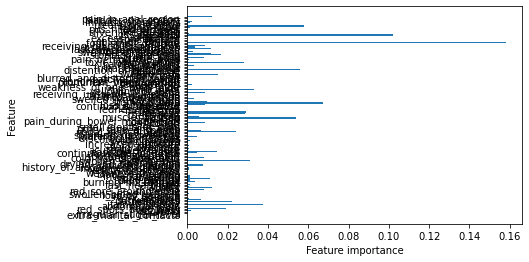

In [25]:
print("Feature importances:\n{}".format(tree1.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree1)

In [26]:
from sklearn.tree import plot_tree

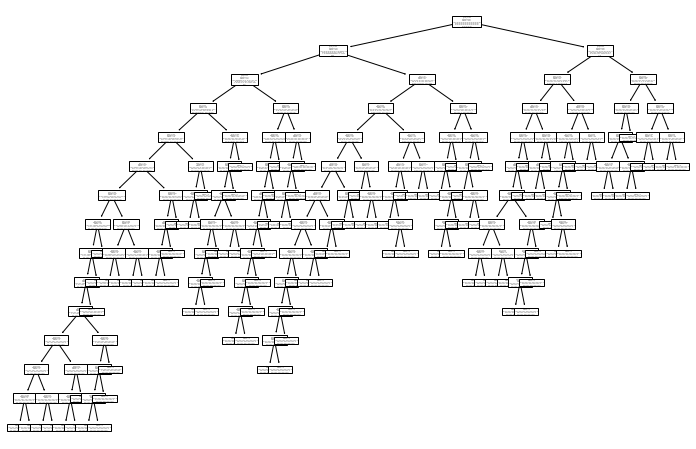

In [27]:
plt.figure(figsize=(12,8))
plot_tree(tree1);

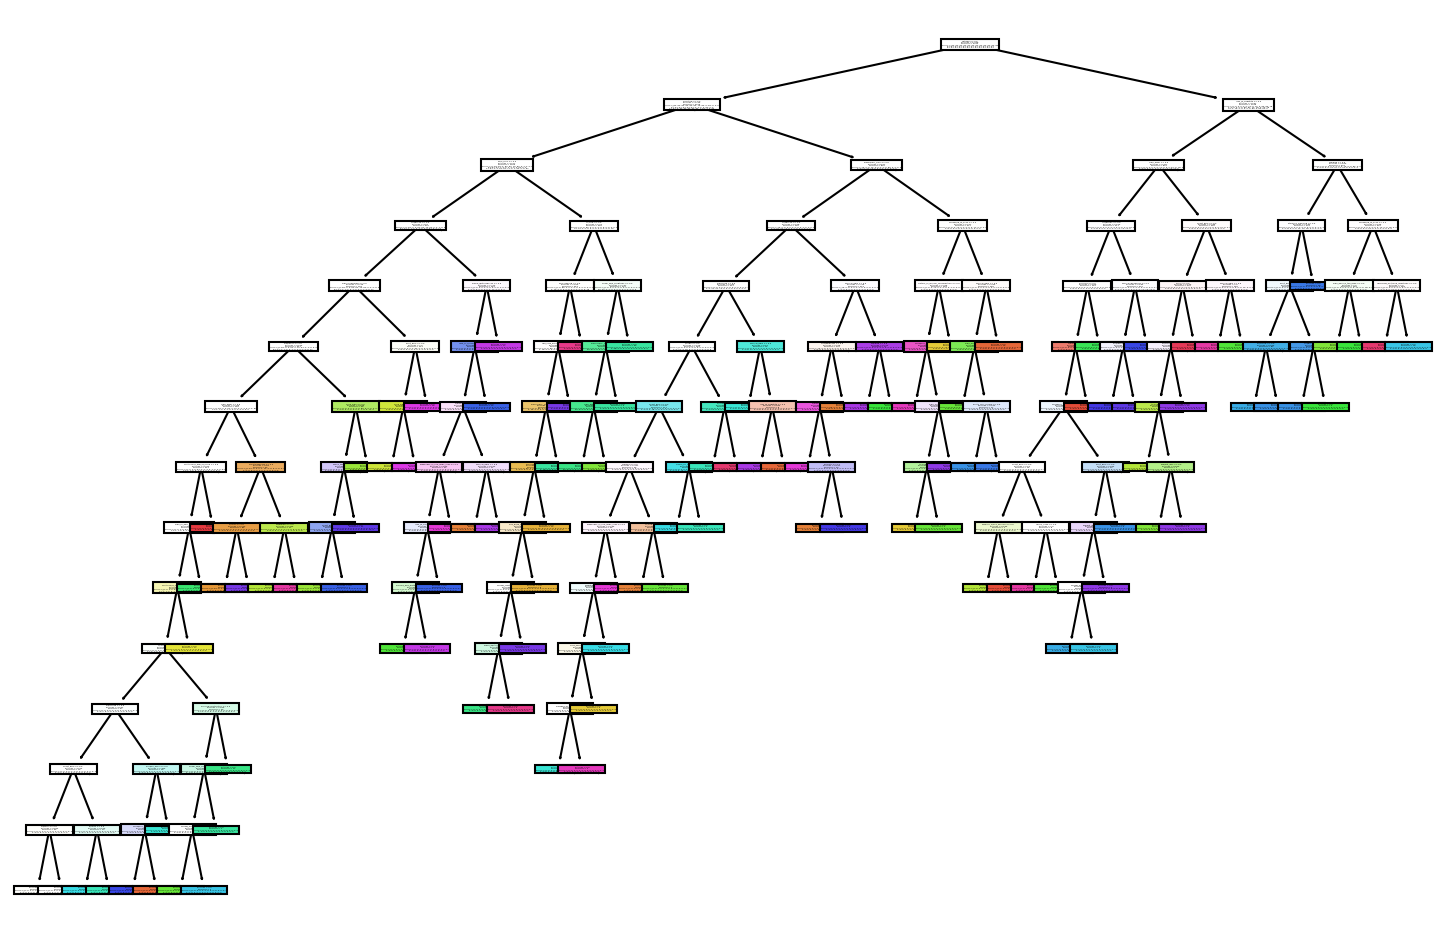

In [28]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree1,filled=True,feature_names=X.columns);

In [29]:
# Define a new dataframe for final results 
data = {'Algorithms': ['Decision Tree'], 
        'Train Score': [tree1.score(X_train, y_train)*100], 
        'Test Score': [tree1.score(X_test, y_test)*100]}

# Storing the results for final comparision

In [30]:
dfnew = pd.DataFrame(data)
print(dfnew)

      Algorithms  Train Score  Test Score
0  Decision Tree    98.461092   98.306233


# RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
forest = RandomForestClassifier()
forest_params = [{'max_depth': list(range(5, 15)), 'n_estimators': list(range(5, 50))}]
clf1 = GridSearchCV(forest, forest_params, cv = 10, scoring='accuracy')
clf1.fit(X_train, y_train)
print(clf1.best_params_)
print(clf1.best_score_)


C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector 

{'max_depth': 11, 'n_estimators': 36}
1.0


In [32]:
forest1 = RandomForestClassifier(n_estimators=47, max_depth=12)
forest1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


C:\Users\Rajeev\AppData\Local\Temp/ipykernel_33348/3484987594.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(X_train, y_train)


Feature importances:
[0.00428744 0.0030458  0.00399192 0.00659234 0.01148716 0.00397475
 0.00414672 0.01259158 0.010662   0.00653168 0.0116363  0.00098474
 0.01500408 0.00341224 0.00259376 0.00770563 0.01016628 0.00611399
 0.00662377 0.00572551 0.0160987  0.00851371 0.0011691  0.00947581
 0.0052019  0.00385865 0.00976691 0.01483393 0.00650635 0.00971659
 0.00802017 0.01342045 0.00865149 0.01392351 0.00189605 0.01631432
 0.01379438 0.00854509 0.00145378 0.00668378 0.00248722 0.0175259
 0.00942611 0.00432043 0.00420572 0.00864735 0.00540884 0.00641817
 0.00878955 0.00728965 0.00392572 0.00092343 0.00389372 0.00640151
 0.00356682 0.00866628 0.00758313 0.00223626 0.00553554 0.01051688
 0.0071051  0.01165302 0.00653456 0.00028646 0.00817998 0.00508769
 0.00957633 0.00809089 0.00667655 0.00275068 0.00754001 0.01116417
 0.00261219 0.00727062 0.01938794 0.00519337 0.00751177 0.00784029
 0.00775903 0.01019295 0.01633534 0.01512433 0.0131573  0.0100384
 0.01412553 0.0029456  0.00177679 0.0086200

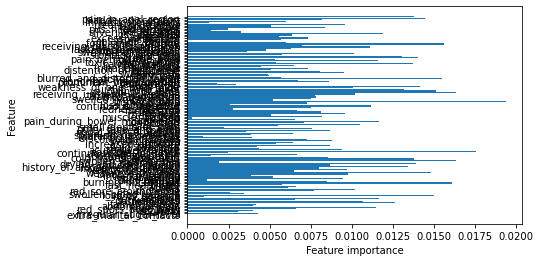

In [33]:
print("Feature importances:\n{}".format(forest1.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest1)

# Storing the results for final comparision

In [34]:
dfnew = dfnew.append({'Algorithms' : 'RandomForestClassifier' , 'Train Score' : forest1.score(X_train, y_train)*100,
                      'Test Score' : forest1.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

               Algorithms  Train Score  Test Score
0           Decision Tree    98.461092   98.306233
1  RandomForestClassifier   100.000000  100.000000


# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
gbrt = GradientBoostingClassifier()
gbrt_params = [{'max_depth': [3,5,7,9],"n_estimators":[5,50,250],"learning_rate":[0.01,0.1,1]}]
clf2 = GridSearchCV(gbrt, gbrt_params, cv = 7, scoring='accuracy')
clf2.fit(X_train, y_train)
print(clf2.best_params_)
print(clf2.best_score_)


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt1 = GradientBoostingClassifier(n_estimators=25,learning_rate=0.01,max_depth=5)
gbrt1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt1.score(X_test, y_test)))

C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on training set: 1.000
Accuracy on test set: 1.000


Feature importances:
[1.45243367e-03 0.00000000e+00 1.38677761e-02 9.27371378e-04
 1.22830826e-02 1.18997051e-03 7.72841197e-04 1.12471324e-02
 7.00530383e-03 2.32189368e-02 2.14392777e-02 1.11577300e-04
 2.44089074e-02 3.29197960e-04 2.23429607e-04 1.32938588e-02
 1.34804764e-02 2.32839774e-04 8.58721453e-04 1.04817232e-02
 2.03418223e-18 2.35161641e-02 2.80050574e-04 1.89322800e-02
 4.95288111e-17 1.86385272e-02 8.92742979e-04 2.44089070e-02
 2.20317929e-02 5.18302476e-03 4.46707739e-04 2.32189368e-02
 2.38135554e-02 3.34443731e-02 3.40889342e-19 1.57958088e-02
 6.83985859e-03 1.00256924e-04 6.62840387e-19 2.17354473e-02
 1.69974272e-02 2.38135681e-02 2.35161568e-02 1.19826410e-04
 5.59236761e-03 1.74495890e-04 5.65739555e-04 1.24964204e-02
 1.82567355e-04 1.58983570e-16 1.00180485e-03 1.78389519e-03
 1.11150486e-02 1.18997051e-03 4.56416522e-03 2.26250122e-02
 9.45149938e-03 5.54375597e-19 1.34165399e-03 6.84355311e-03
 2.25978741e-03 1.85554613e-03 4.05397347e-04 1.02408203e-03
 2.

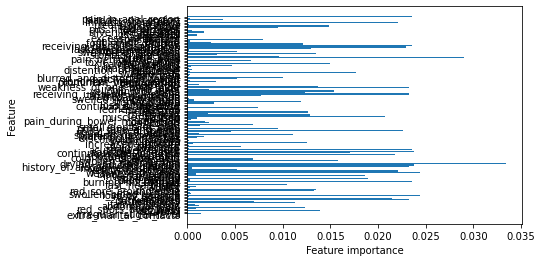

In [36]:
print("Feature importances:\n{}".format(gbrt1.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(gbrt1)

In [37]:
dfnew = dfnew.append({'Algorithms' : 'GradientBoostingClassifier' , 'Train Score' : gbrt1.score(X_train, y_train)*100,
                      'Test Score' : gbrt1.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                   Algorithms  Train Score  Test Score
0               Decision Tree    98.461092   98.306233
1      RandomForestClassifier   100.000000  100.000000
2  GradientBoostingClassifier   100.000000  100.000000


# Applying Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
gnb = GaussianNB()
gnb_params = {'var_smoothing': np.logspace(0,-9, num=100)}
clf3 = GridSearchCV(gnb, gnb_params, cv = 10, scoring='accuracy')
clf3.fit(X_train, y_train)
print(clf3.best_params_)
print(clf3.best_score_)



C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

{'var_smoothing': 1.0}
1.0


C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [39]:
gnb1 = GaussianNB(var_smoothing=1.0)
gnb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gnb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gnb1.score(X_test, y_test)))

C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [40]:
dfnew = dfnew.append({'Algorithms' : 'GaussianNB' , 'Train Score' : gnb1.score(X_train, y_train)*100,
                      'Test Score' : gnb1.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                   Algorithms  Train Score  Test Score
0               Decision Tree    98.461092   98.306233
1      RandomForestClassifier   100.000000  100.000000
2  GradientBoostingClassifier   100.000000  100.000000
3                  GaussianNB   100.000000  100.000000


# KNN 

In [41]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier()
knn_params= {"n_neighbors":list(range(1, 20))}
clf4 = GridSearchCV(knn, knn_params, cv = 10, scoring='accuracy')
clf4.fit(X_train, y_train)
print(clf4.best_params_)
print(clf4.best_score_)


C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

{'n_neighbors': 1}
1.0


C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [42]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train) 
print("Accuracy on training set: {:.3f}".format(knn1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn1.score(X_test, y_test)))

C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [43]:
dfnew = dfnew.append({'Algorithms' : 'KNNClassifier' , 'Train Score' : knn1.score(X_train, y_train)*100,
                      'Test Score' : knn1.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                   Algorithms  Train Score  Test Score
0               Decision Tree    98.461092   98.306233
1      RandomForestClassifier   100.000000  100.000000
2  GradientBoostingClassifier   100.000000  100.000000
3                  GaussianNB   100.000000  100.000000
4               KNNClassifier   100.000000  100.000000


# Applying Support Vector Machine

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
svm=SVC()
svm_params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
clf5 = GridSearchCV(svm, svm_params, cv = 10, scoring='accuracy')
clf5.fit(X_train, y_train)
print(clf5.best_params_)
print(clf5.best_score_)


C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
1.0


In [45]:
svm1 = SVC(C=0.1,gamma=1,kernel="rbf")
svm1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svm1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm1.score(X_test, y_test)))

C:\Users\Rajeev\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [46]:
dfnew = dfnew.append({'Algorithms' : 'SVM' , 'Train Score' : svm1.score(X_train, y_train)*100,
                      'Test Score' : svm1.score(X_test, y_test)*100} , ignore_index=True)
print(dfnew)

                   Algorithms  Train Score  Test Score
0               Decision Tree    98.461092   98.306233
1      RandomForestClassifier   100.000000  100.000000
2  GradientBoostingClassifier   100.000000  100.000000
3                  GaussianNB   100.000000  100.000000
4               KNNClassifier   100.000000  100.000000
5                         SVM   100.000000  100.000000


In [47]:
dffinal = dfnew.sort_values(by=['Train Score'],ascending=False)
print(dffinal)
print(dffinal.info())

                   Algorithms  Train Score  Test Score
1      RandomForestClassifier   100.000000  100.000000
2  GradientBoostingClassifier   100.000000  100.000000
3                  GaussianNB   100.000000  100.000000
4               KNNClassifier   100.000000  100.000000
5                         SVM   100.000000  100.000000
0               Decision Tree    98.461092   98.306233
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Algorithms   6 non-null      object 
 1   Train Score  6 non-null      float64
 2   Test Score   6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes
None


Text(0, 0.5, 'Accuracy in %')

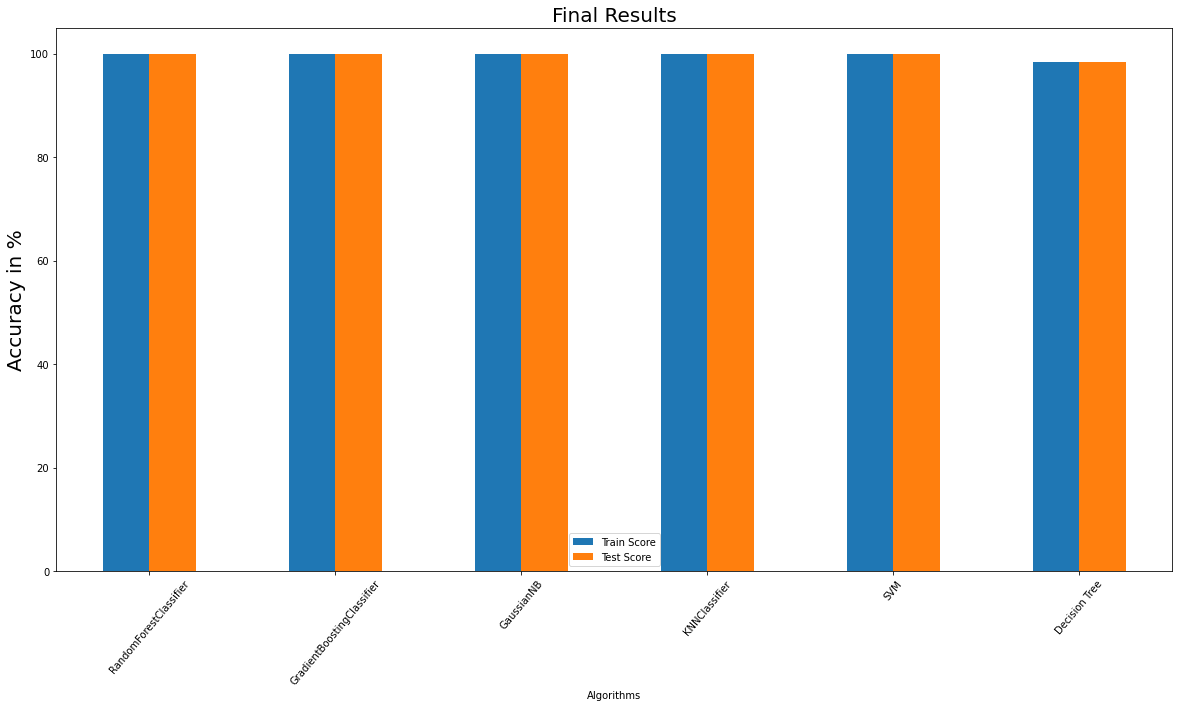

In [48]:
dffinal.plot.bar(x='Algorithms',rot=50,figsize=(20,10))
plt.title('Final Results', fontsize=20)
plt.ylabel('Accuracy in %', fontsize=20)